In [1]:
import pandas as pd
pd.__version__

'1.3.4'

In [7]:
names_series = pd.Series(["Mark", "John", "Daniel", "Greg"])
names_series

0      Mark
1      John
2    Daniel
3      Greg
dtype: object

In [3]:
salary_series = pd.Series([1000, 1500, 2300, 5000])
salary_series

0    1000
1    1500
2    2300
3    5000
dtype: int64

In [4]:
names_series.describe()

count        4
unique       4
top       Mark
freq         1
dtype: object

In [5]:
salary_series.describe()

count       4.000000
mean     2450.000000
std      1782.320585
min      1000.000000
25%      1375.000000
50%      1900.000000
75%      2975.000000
max      5000.000000
dtype: float64

In [19]:
salary_series_increased = pd.Series([1100, 1600, 2400, 5100])
for s in salary_series_increased:
    print(s)

1100
1600
2400
5100


In [6]:
salary_series.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
salary_series.index = names_series
salary_series

Mark      1000
John      1500
Daniel    2300
Greg      5000
dtype: int64

In [10]:
salary_series['Mark']

1000

In [12]:
names = ["Mark", "John", "Daniel", "Greg"]
salaries = [1000, 1500, 2300, 5000]
salary_series_improved = pd.Series(salaries, index=names)
salary_series_improved

Mark      1000
John      1500
Daniel    2300
Greg      5000
dtype: int64

#### DataFrame

In [23]:
salaries = [
	("Mark", 1000, 23),
	("John", 1500, 25),
	("Daniel", 2300, 38),
	("Greg", 5000, 42)
]

In [24]:
df = pd.DataFrame(salaries)
df

,0,1,2
0,Mark,1000,23
1,John,1500,25
2,Daniel,2300,38
3,Greg,5000,42


In [25]:
df = pd.DataFrame(salaries, columns=["name", "salary", "age"])
df = df.set_index("name")
df

,salary,age
name,,
Mark,1000,23
John,1500,25
Daniel,2300,38
Greg,5000,42


In [26]:
df.describe()

,salary,age
count,4.000000,4.000000
mean,2450.000000,32.000000
std,1782.320585,9.416298
min,1000.000000,23.000000
25%,1375.000000,24.500000
50%,1900.000000,31.500000
75%,2975.000000,39.000000
max,5000.000000,42.000000


In [27]:
df


,salary,age
name,,
Mark,1000,23
John,1500,25
Daniel,2300,38
Greg,5000,42


In [28]:
salary_increased_series = df['salary'].apply(lambda salary: salary + 2000)
df['salary'] = salary_increased_series
df

,salary,age
name,,
Mark,3000,23
John,3500,25
Daniel,4300,38
Greg,7000,42


In [29]:
salary_raise = [2000, 2000, 2000, 2000]
df['salary'] + salary_raise

name
Mark      5000
John      5500
Daniel    6300
Greg      9000
Name: salary, dtype: int64

#### Ćwiczenie: dataframe

In [30]:
salaries = [
	("Mark", 1000, 23),
	("John", 1500, 25),
	("Daniel", 2300, 38),
	("Greg", 5000, 42)
]

In [34]:
df = pd.DataFrame(salaries, columns=["name", "salary", "age"])
df["initials"] =  df.apply(lambda row: row['name'][:1], axis=1)
df = df.set_index("name")
df

,salary,age,initials
name,,,
Mark,1000,23,M
John,1500,25,J
Daniel,2300,38,D
Greg,5000,42,G


<AxesSubplot:xlabel='name'>

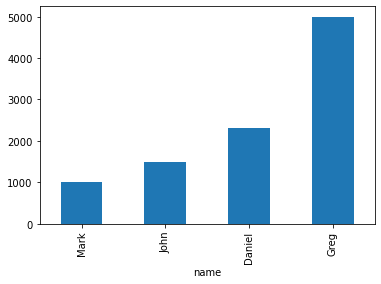

In [35]:
df['salary'].plot(kind='bar')

#### Ćwiczenie: rysowanie z DataFrame

<AxesSubplot:xlabel='name'>

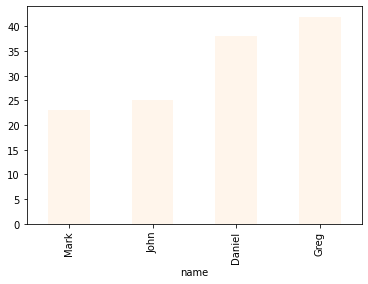

In [38]:
df['age'].plot(kind='bar', colormap='Oranges')

#### Iterator

In [39]:
salaries = [1000, 5000, 7000]
salary_iterator = iter(salaries)
print(next(salary_iterator))
print(next(salary_iterator))
print(next(salary_iterator))

1000
5000
7000


In [40]:
salary_iterator = iter(salaries)
salary_sum = 0
for salary in salary_iterator:
	salary_sum = salary_sum + salary
print("Total salaries = %d" % salary_sum)

Total salaries = 13000


#### Konstrukcja

In [42]:
def give_me_first_ten_numbers():
    for i in range(1,11):
        yield i

for number in give_me_first_ten_numbers():
    print(number)

1
2
3
4
5
6
7
8
9
10


#### Ćwiczenie: generuję liczby

In [43]:
def give_me_x_numbers(x):
    for i in range(1,x):
        yield i
        
sum = 0

for number in give_me_x_numbers(1000):
    sum +=number

print(sum)

499500


#### Zadanie: więcej wykresów

<AxesSubplot:title={'center':'Proce of goods (USD)'}, xlabel='month'>

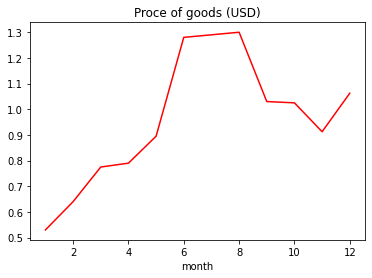

In [49]:
prices = [
	(1, 2.12),
	(2, 2.56),
	(3, 3.10),
	(4, 3.16),
	(5, 3.58),
	(6, 5.12),
	(7, 5.16),
	(8, 5.20),
	(9, 4.12),
	(10, 4.10),
	(11, 3.65),
	(12, 4.25),
]

df = pd.DataFrame(prices, columns=["month", "pricePLN"])
df["priceUSD"] =  df.apply(lambda row: row['pricePLN'] / 4, axis=1)
df = df.set_index("month")

df['priceUSD'].plot(kind='line', style=['--'], colormap='autumn', title='Proce of goods (USD)')
